In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [67]:
# [[  6.26666667 224.54978381  67.64769491   7.47289234  17.74164062
#    58.57031691   9.05241127   0.30291181   0.42120639  37.85813619]]

# Create this testing input for the ml model
testing_input_low = np.array([[6.26666667, 224.54978381, 67.64769491, 7.47289234, 17.74164062, 58.57031691, 9.05241127, 0.30291181, 0.42120639, 37.85813619]]).reshape(1, -1)
# [[15.58223333 38.93386959  5.0858643  10.20602838  5.80719243  9.38118542
#    0.49831963  0.61902544  1.75748066  7.62006763]]
testing_input_high = np.array([[15.58223333, 38.93386959, 5.0858643, 10.20602838, 5.80719243, 9.38118542, 0.49831963, 0.61902544, 1.75748066, 7.62006763]]).reshape(1, -1)

In [44]:
# load csv
df = pd.read_csv('Updated_TUG_final_results.csv')

# Data cleaning


df = df[df.columns.drop(list(df.filter(regex='circular_mean')))]
df = df[df.columns.drop(list(df.filter(regex='circular_std')))]
df = df[df.columns.drop(list(df.filter(regex='mean_magnitude')))]
df = df[df.columns.drop(list(df.filter(regex='LEFT')))]
df = df[df.columns.drop(list(df.filter(regex='TOE')))]
df = df[df.columns.drop(list(df.filter(regex='NOSE')))]
df = df[df.columns.drop(list(df.filter(regex='distance_walked')))]
df = df[df.columns.drop(list(df.filter(regex='Stand')))]
df = df[df.columns.drop(list(df.filter(regex='Walk To')))]
df = df[df.columns.drop(list(df.filter(regex='Turn')))]
df = df[df.columns.drop(list(df.filter(regex='Walk Back')))]
df = df[df.columns.drop(list(df.filter(regex='Sit')))]


# feature engineering
# average max angle
# TODO: FEATURE ENGINEERING

df = df.sort_values(by=['frailty_score'])
df

,test,elapsed_time,average_speed,average_stride_length,RIGHT_SHOULDER_std_dev,RIGHT_HIP_std_dev,RIGHT_KNEE_std_dev,RIGHT_ANKLE_std_dev,frailty_score
0,TUG,5.500000,121.141992,94.577187,82.282711,41.000000,44.00000,74.510839,1
1,TUG,17.851167,35.996692,32.583830,6.834731,15.222791,5.93483,10.495398,100


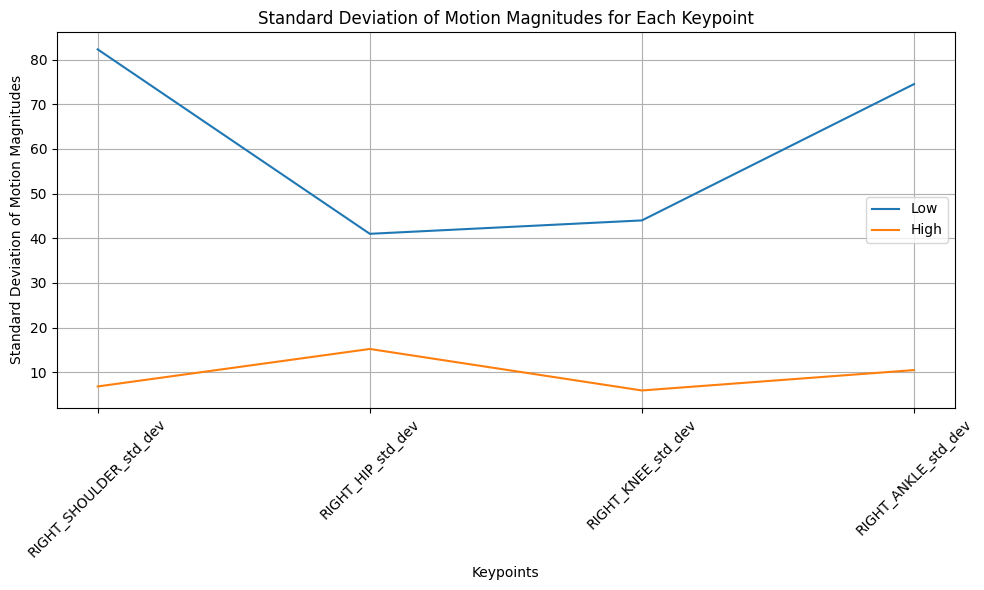

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Define keypoints columns
keypoints_columns = [
    'RIGHT_SHOULDER_std_dev', 'RIGHT_HIP_std_dev', 
    'RIGHT_KNEE_std_dev', 'RIGHT_ANKLE_std_dev']


# Artificially change some values to see the effect on the plot
# df['LEFT_HIP_std_dev'].iloc[1]= df['LEFT_HIP_std_dev'].iloc[1] -6

# Plot
plt.figure(figsize=(10, 6))

def frailty_level(score):
    if score == 1:
        return 'Low'
    elif score == 100:
        return 'High'
    else:
        return 'Moderate'

for index, row in df.iterrows():
    plt.plot(keypoints_columns, row[keypoints_columns], label=f'{frailty_level(row["frailty_score"])}')

plt.xlabel('Keypoints')
plt.ylabel('Standard Deviation of Motion Magnitudes')
plt.title('Standard Deviation of Motion Magnitudes for Each Keypoint')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Index(['time', 'average_speed', 'RIGHT_SHOULDER_std_dev', 'RIGHT_HIP_std_dev',
       'RIGHT_KNEE_std_dev', 'RIGHT_ANKLE_std_dev', 'frailty_score'],
      dtype='object')


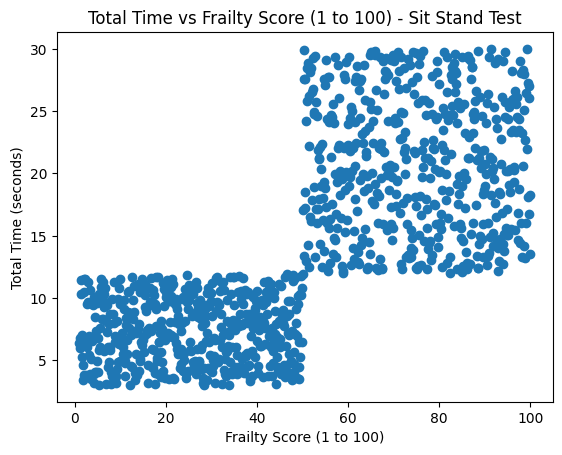

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains the benchmarks for the lowest and highest frailty subjects
lowest_frailty_benchmark = df.iloc[0]  # Use this for upper bounds (least frail)
highest_frailty_benchmark = df.iloc[-1]  # Use this for lower bounds (most frail)

# Generate 1000 samples of synthetic data with frailty scores from 1 to 100
n_samples = 1000
frailty_scores = np.round(np.linspace(1, 100, n_samples), 1)

# List to store generated synthetic data
synthetic_data = []

# Generate synthetic data based on frailty score rules
for score in frailty_scores:
    # Rule: for scores > 50, total time > 12 seconds, scaled by frailty score
    if score > 50:
        total_time = np.random.uniform(12, 30)  # Time increases with frailty score
        average_speed = np.random.uniform(20, 50)  # Speed decreases with frailty score
    else:
        total_time = np.random.uniform(3, 12)  # Faster times for lower scores
        average_speed = np.random.uniform(50, 150)
    
    # Max and Min Angles: Decrease with frailty score, bounded by benchmarks
    # max_max_angle = np.random.uniform(highest_frailty_benchmark['max_max_angle'], lowest_frailty_benchmark['max_max_angle'])
    # min_max_angle = np.random.uniform(highest_frailty_benchmark['min_max_angle'], lowest_frailty_benchmark['min_max_angle'])
    # max_max_angle = np.random.uniform(160, 179.9)
    # min_max_angle = np.random.uniform(150,170)

    # Joint movement variation: Decrease with frailty score, bounded by benchmarks
    shoulder_std = np.random.uniform(highest_frailty_benchmark['RIGHT_SHOULDER_std_dev'], lowest_frailty_benchmark['RIGHT_SHOULDER_std_dev'])
    hip_std = np.random.uniform(highest_frailty_benchmark['RIGHT_HIP_std_dev'], lowest_frailty_benchmark['RIGHT_HIP_std_dev'])
    knee_std = np.random.uniform(highest_frailty_benchmark['RIGHT_KNEE_std_dev'], lowest_frailty_benchmark['RIGHT_KNEE_std_dev'])
    ankle_std = np.random.uniform(highest_frailty_benchmark['RIGHT_ANKLE_std_dev'], lowest_frailty_benchmark['RIGHT_ANKLE_std_dev'])

    # Append the generated data for this row
    synthetic_data.append({
        'time': total_time,
        'average_speed': average_speed,
        # 'min_max_angle': min_max_angle,
        'RIGHT_SHOULDER_std_dev': shoulder_std,
        'RIGHT_HIP_std_dev': hip_std,
        'RIGHT_KNEE_std_dev': knee_std,
        'RIGHT_ANKLE_std_dev': ankle_std,
        'frailty_score': score
    })

# 



# Convert the list of synthetic data to a DataFrame
df_synthetic = pd.DataFrame(synthetic_data)
df_synthetic['time'] = pd.to_numeric(df_synthetic['time'], errors='coerce')  # Convert to numeric, NaN for invalid parsing
# df_synthetic['avg_duration'] = df_synthetic['time'].apply(lambda x: x/5)
# Save the synthetic data to a CSV file
df_synthetic.to_csv('synthetic_data_tug.csv', index=False)

# Print the synthetic DataFrame
print(df_synthetic.columns)

# Plot the synthetic data for visualizing the relationship between frailty score and total time
plt.scatter(df_synthetic['frailty_score'], df_synthetic['time'])
plt.xlabel('Frailty Score (1 to 100)')
plt.ylabel('Total Time (seconds)')
plt.title('Total Time vs Frailty Score (1 to 100) - Sit Stand Test')
plt.show()


In [55]:
import pandas as pd
imported_syntethic_df = pd.read_csv('synthetic_data_tug.csv')


# Feature engineering
imported_syntethic_df['shoulder_hip_ratio'] = imported_syntethic_df['RIGHT_SHOULDER_std_dev'] / imported_syntethic_df['RIGHT_HIP_std_dev']
imported_syntethic_df['knee_ankle_ratio'] = imported_syntethic_df['RIGHT_KNEE_std_dev'] / imported_syntethic_df['RIGHT_ANKLE_std_dev']
imported_syntethic_df['hip_knee_ratio'] = imported_syntethic_df['RIGHT_HIP_std_dev'] / imported_syntethic_df['RIGHT_KNEE_std_dev']
imported_syntethic_df['movement_stability'] = (imported_syntethic_df['RIGHT_SHOULDER_std_dev'] + 
                                      imported_syntethic_df['RIGHT_HIP_std_dev'] + 
                                      imported_syntethic_df['RIGHT_KNEE_std_dev'] + 
                                      imported_syntethic_df['RIGHT_ANKLE_std_dev']) / 4


X = imported_syntethic_df.drop(columns=['frailty_score'])
print(X.columns)
y = imported_syntethic_df['frailty_score']
y

Index(['time', 'average_speed', 'RIGHT_SHOULDER_std_dev', 'RIGHT_HIP_std_dev',
       'RIGHT_KNEE_std_dev', 'RIGHT_ANKLE_std_dev', 'shoulder_hip_ratio',
       'knee_ankle_ratio', 'hip_knee_ratio', 'movement_stability'],
      dtype='object')


0        1.0
1        1.1
2        1.2
3        1.3
4        1.4
       ...  
995     99.6
996     99.7
997     99.8
998     99.9
999    100.0
Name: frailty_score, Length: 1000, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features (X) and target (y)
X = imported_syntethic_df.drop(columns=['frailty_score'])  # All columns except frailty_score
y = imported_syntethic_df['frailty_score']  # Target variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = lr_model.score(X_test, y_test)


print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2_score:.2f}')

# print(lr_model.predict(testing_input.drop(columns=['frailty_score']).values.reshape(1, -1)))

Mean Absolute Error: 14.70
Mean Squared Error: 308.18
R^2 Score: 0.62


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Importing Random Forest Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2score = rf_model.score(X_test, y_test)

# Print the evaluation metrics
print(f'Mean Absolute Error: {rf_mae:.2f}')
print(f'Mean Squared Error: {rf_mse:.2f}')
print(f'R^2 Score: {rf_r2score:.2f}')

Mean Absolute Error: 12.62
Mean Squared Error: 221.68
R^2 Score: 0.72


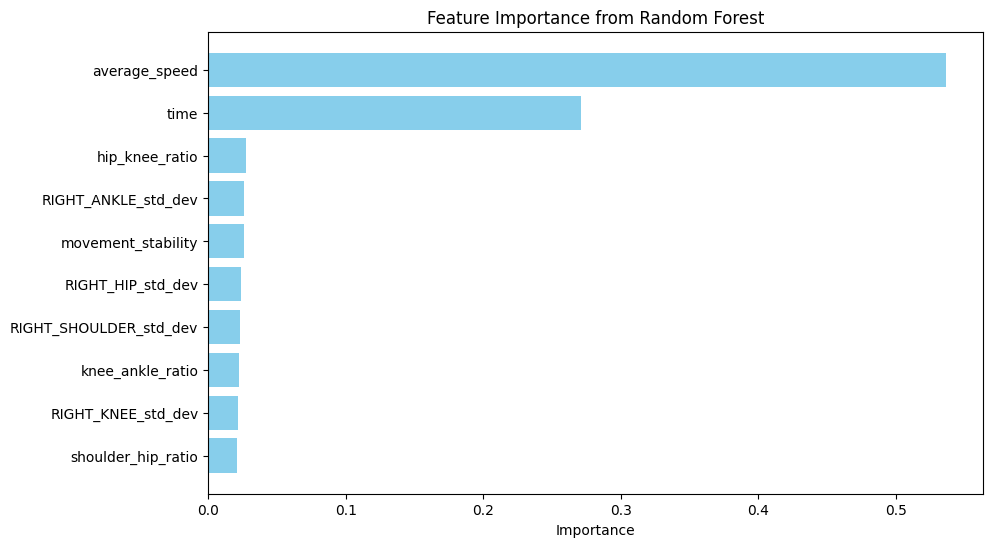

In [58]:
# Import the required library for plotting
import matplotlib.pyplot as plt

# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Get the feature names from the dataset
feature_names = X_train.columns

# Create a DataFrame for the feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the feature importances in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search model to the training data (without weighting)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Get the best estimator (model with the best parameters)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set (without weighting)
y_pred_best_rf = best_rf_model.predict(X_test)

# Print predictions
print(f"y_pred_best_rf: {y_pred_best_rf}")

# Calculate performance metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

print(f"Best Random Forest Model MAE: {mae_best_rf:.2f}")
print(f"Best Random Forest Model MSE: {mse_best_rf:.2f}")
print(f"Best Random Forest Model R^2 Score: {best_rf_model.score(X_test, y_test):.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=

In [60]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_score_xgb = xgb_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"XGBoost Model MAE: {mae_xgb:.2f}")
print(f"XGBoost Model MSE: {mse_xgb:.2f}")
print(f"XGBoost Model R^2 Score: {r2_score_xgb:.2f}")


XGBoost Model MAE: 13.30
XGBoost Model MSE: 253.30
XGBoost Model R^2 Score: 0.68


In [68]:
# print all scores for different models
print(f"Linear Regression Model MAE: {mae:.2f}")
print(f"Linear Regression Model MSE: {mse:.2f}")
print(f"Linear Regression Model R^2 Score: {r2_score:.2f}")

print(f"Random Forest Model MAE: {rf_mae:.2f}")
print(f"Random Forest Model MSE: {rf_mse:.2f}")
print(f"Random Forest Model R^2 Score: {rf_r2score:.2f}")

print(f"Best Random Forest Model MAE: {mae_best_rf:.2f}")
print(f"Best Random Forest Model MSE: {mse_best_rf:.2f}")
print(f"Best Random Forest Model R^2 Score: {best_rf_model.score(X_test, y_test):.2f}")

print(f"XGBoost Model MAE: {mae_xgb:.2f}")
print(f"XGBoost Model MSE: {mse_xgb:.2f}")
print(f"XGBoost Model R^2 Score: {r2_score_xgb:.2f}")


# present in a table format

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Best Random Forest', 'XGBoost'],
    'MAE': [mae, rf_mae, mae_best_rf, mae_xgb],
    'MSE': [mse, rf_mse, mse_best_rf, mse_xgb],
    'R^2 Score': [r2_score, rf_r2score, best_rf_model.score(X_test, y_test), r2_score_xgb]
})
results


print(f"Frailty Low Score:{best_rf_model.predict(testing_input_low)}")
print(f"Frailty High Score:{best_rf_model.predict(testing_input_high)}")
      

Linear Regression Model MAE: 14.70
Linear Regression Model MSE: 308.18
Linear Regression Model R^2 Score: 0.62
Random Forest Model MAE: 12.62
Random Forest Model MSE: 221.68
Random Forest Model R^2 Score: 0.72
Best Random Forest Model MAE: 12.56
Best Random Forest Model MSE: 219.28
Best Random Forest Model R^2 Score: 0.73
XGBoost Model MAE: 13.30
XGBoost Model MSE: 253.30
XGBoost Model R^2 Score: 0.68
Frailty Low Score:[30.9263019]
Frailty High Score:[77.03575996]


/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/brennanlee/Desktop/opencv-healthcare/myenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
import joblib

# get current timestamp
import datetime
now = datetime.datetime.now()
# Save the best Random Forest model to a file
joblib.dump(best_rf_model, f'TUG_rf_model_{now}.pkl')

['TUG_rf_model_2024-10-23 03:13:45.368657.pkl']